In [ ]:
#Proyecto Data Science I

#Kayreth Marrero

#Los datos a analizar abarcan una amplia gama de información relacionada con préstamos, incluyendo detalles sobre 
#el género del prestatario, límites y montos del préstamo, propósitos y tipos de préstamo, así como los ingresos del 
#prestatario, entre otros atributos relevantes. Esta diversidad de datos ofrece una perspectiva integral que permite 
#explorar y comprender en profundidad diversos aspectos del proceso de préstamos y su relación con los prestatarios.

#Objetivo: Se busca crear un modelo de aprendizaje automático que pueda analizar características específicas de los 
#préstamos y predecir con precisión si serán pagados puntualmente o si resultarán en un incumplimiento. 
#La precisión de este modelo es crucial para ayudar a los prestamistas a evaluar y mitigar el riesgo crediticio, 
#permitiendo decisiones financieras más informadas y reduciendo las pérdidas asociadas con los préstamos incobrables. 
#Esto mediante la variable "Status". Esta variable determina si un préstamo se paga en término (1) o se defaultea (0).

#Hipótesis: Se plantea que al analizar los atributos de los préstamos, como el monto, el tipo y el propósito del préstamo, 
#así como la solvencia crediticia del prestatario, junto con otros factores relevantes, se podrá desarrollar un modelo 
#predictivo eficaz para determinar con precisión la rentabilidad de los préstamos para el prestamista.
#Este modelo proporcionará información valiosa para la toma de decisiones financieras estratégicas, permitiendo una gestión 
#más eficiente y rentable de la cartera de préstamos.

In [1]:
#Importar Librerias iniciales
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Cargar y visualizar un resumen del archivo
Loan_df = pd.read_csv('Loan_Default.csv', delimiter=',', encoding='latin1')
Loan_df

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,...,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
148666,173556,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,...,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
148667,173557,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0
148668,173558,2019,cf,Female,nopre,type1,p4,l1,nopc,nob/c,...,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0


In [3]:
#Exploracion de los datos
Loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [4]:
#Resumen estadistico
Loan_df.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [5]:
#Visualizacion de columnas
Loan_df.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

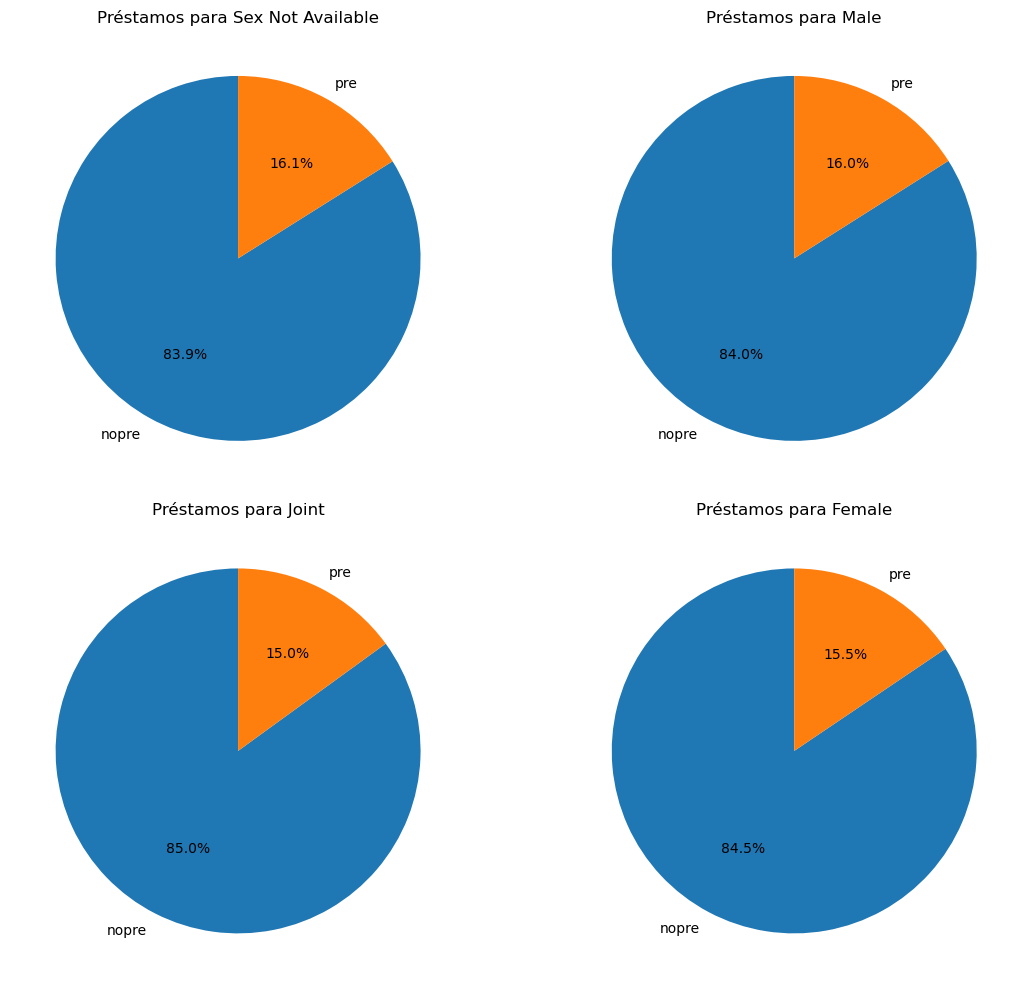

In [6]:
#Gráfico 1: Cantidad de prestamos que tienen pre aprobados y no pre aprobados por género

#Filtrar las filas con valores no nulos o vacíos en género y aprobación anticipada
filtered_df = Loan_df.dropna(subset=['Gender', 'approv_in_adv'])

#Contar la cantidad de préstamos por género y estado de aprobación
counts = filtered_df.groupby(['Gender', 'approv_in_adv']).size().unstack(fill_value=0)

#Crear una figura y colocar los titulos
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
titles = ['Sex Not Available', 'Male', 'Joint', 'Female']

#Iterar sobre cada subplot y crear el gráfico
for i, (gender, ax) in enumerate(zip(['Sex Not Available', 'Male', 'Joint', 'Female'], axs.flat)):
    counts_gender = counts.loc[gender]
    ax.pie(counts_gender, labels=counts_gender.index, autopct='%1.1f%%', startangle=90)
    ax.set_title('Préstamos para ' + titles[i])

# Ajustar el espaciado entre subplots y mostrar los gráficos
plt.tight_layout()
plt.show()

In [ ]:
#Conclusiones Gráfico 1: La mayoría de las solicitudes de préstamo son para préstamos sin pre-aprobación,
#independientemente del sexo. Hay una pequeña diferencia en el porcentaje de solicitudes de préstamo con pre-aprobación 
#entre hombres y mujeres. Además, los préstamos solicitados por más de una persona, categorizados como "Joint", 
#tienen un índice de pre-aprobación del 15%, similar al índice de pre-aprobación de las solicitudes realizadas por mujeres. 
#En los casos donde no se especifica el género del prestatario, se observa el mayor índice de pre-aprobación.

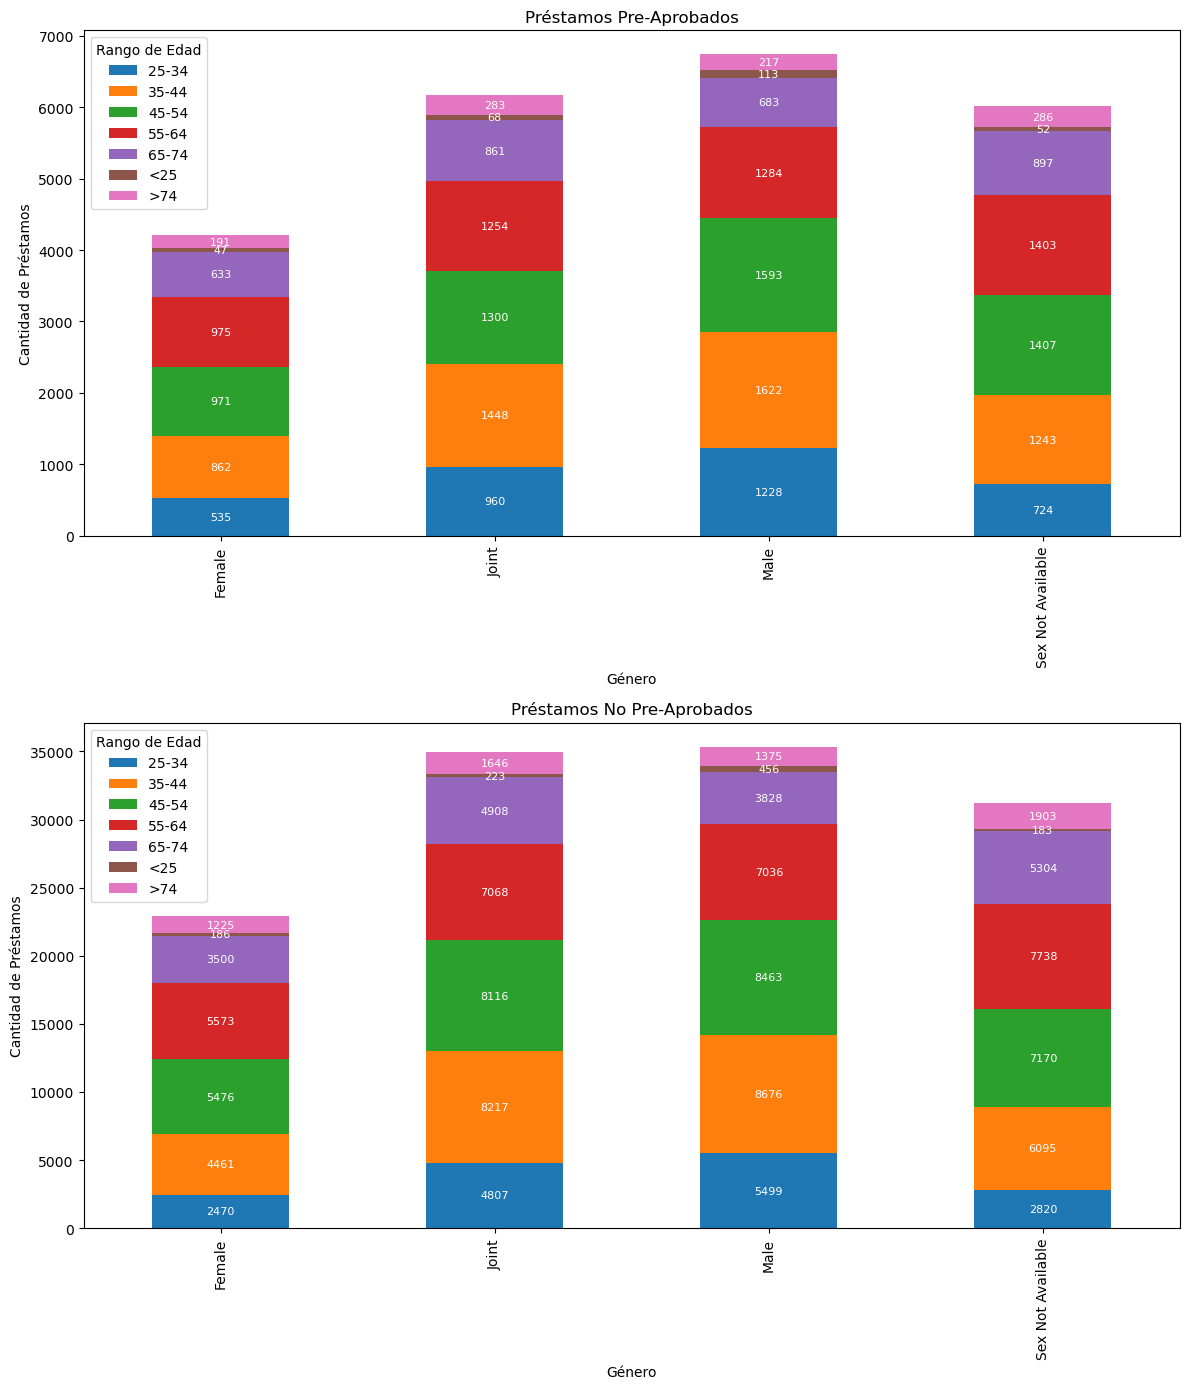

In [7]:
#Gráfico 2: Rango de edades donde tienen préstamo con pre-aprobación y no pre-aprobación

#Filtrar las filas con valores no nulos o vacíos en género y aprobación anticipada y edad
filtered_df = Loan_df.dropna(subset=['Gender', 'approv_in_adv', 'age'])

#Crear una figura, dos subplots y titulos
fig, axs = plt.subplots(2, figsize=(12, 14))
titles = ['Préstamos Pre-Aprobados', 'Préstamos No Pre-Aprobados']

#Obtener todos los rangos de edad únicos
age_categories = sorted(filtered_df['age'].unique())

#Definir un diccionario de colores personalizados para cada rango de edad
color_map = {age_category: plt.cm.tab10(i) for i, age_category in enumerate(age_categories)}

#Iterar sobre cada subplot y crear el gráfico correspondiente
for i, (approval_status, ax) in enumerate(zip(['pre', 'nopre'], axs)):
    # Filtrar el DataFrame por estado de aprobación
    approval_df = filtered_df[filtered_df['approv_in_adv'] == approval_status]
    
    # Contar la cantidad de préstamos por género y rango de edad
    counts = approval_df.groupby(['Gender', 'age']).size().unstack(fill_value=0)
    
    # Plotear las barras
    bars = counts.plot(kind='bar', stacked=True, ax=ax, color=[color_map[age_category] for age_category in counts.columns])
    
    ax.set_title(titles[i])
    ax.set_xlabel('Género')
    ax.set_ylabel('Cantidad de Préstamos')
    
    # Mostrar los rangos de edad como la leyenda
    ax.legend(title='Rango de Edad', loc='upper left')
    
    # Agregar etiquetas de rangos de edad en cada color
    for bar in bars.patches:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2, int(height), ha='center', va='center', color='white', fontsize=8)

# Ajustar el espaciado y mostrar el gráfico
plt.tight_layout()
plt.show()

In [ ]:
#Conclusiones Gráfico 2: En cuanto a las solicitudes de préstamos con pre-aprobación, se observa que los préstamos en conjunto 
#"Joint" y los solicitados por hombres "Male" lideran en términos de frecuencia. Además, se destaca que los grupos de edad 
#con mayor pre-aprobación se dividen en dos categorías: el rango de 55-64 años para mujeres "Female" y género no definido 
#"Sex Not Available", y el rango de edad de 35-44 años para las solicitudes en conjunto "Joint" y hombres "Male". 
#Estas características se mantienen consistentes incluso para los préstamos sin pre-aprobación

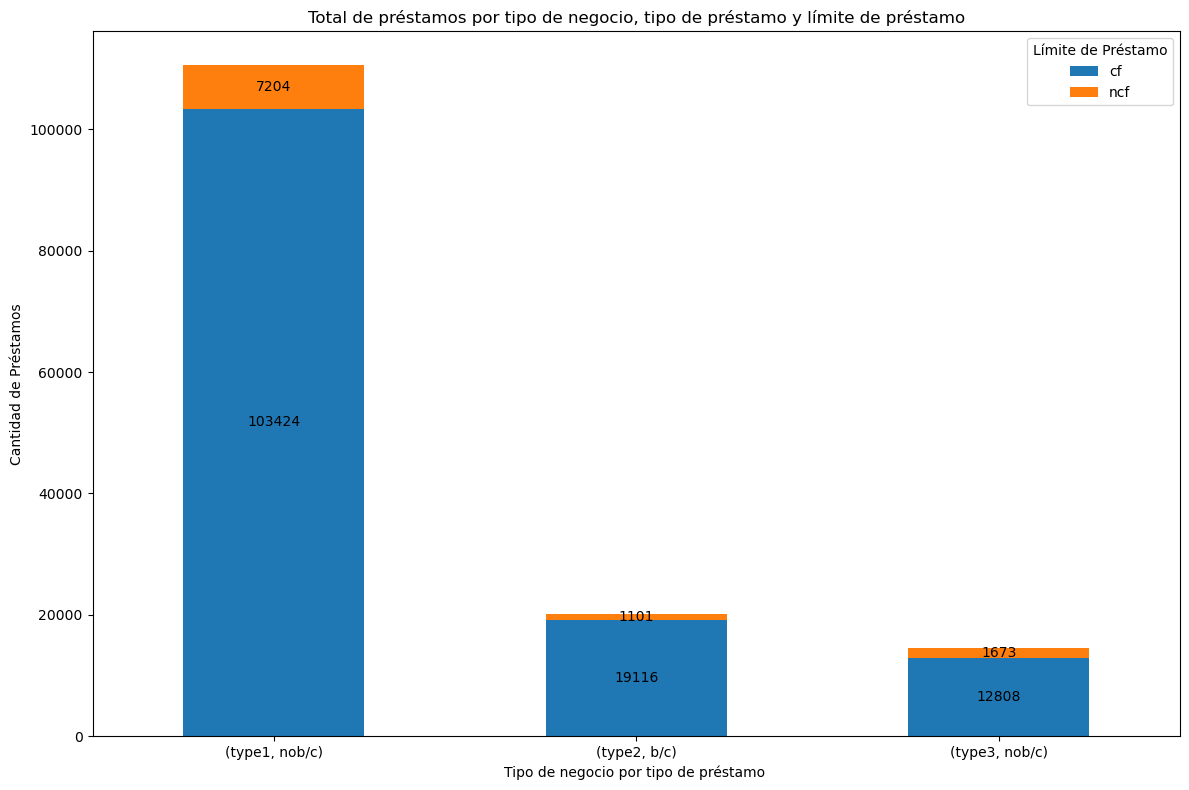

In [10]:
#Gráfico 3: Total de préstamos por tipo de negocio, tipo de préstamos y el límite de préstamo

#Filtrar las filas con valores no nulos
filtered_df = Loan_df.dropna(subset=['loan_type', 'business_or_commercial', 'loan_limit'])

#Contar la cantidad de préstamos
counts = filtered_df.groupby(['loan_type', 'business_or_commercial', 'loan_limit']).size().unstack(fill_value=0)

#Crear el gráfico de barras
ax = counts.plot(kind='bar', stacked=True, figsize=(12, 8))

# Obtener el total de cada grupo de barras
totals = [sum(counts[col]) for col in counts.columns]

#Agregar etiquetas con los totales de las barras
for i, p in enumerate(ax.patches):
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{int(height)}', (x + width/2, y + height/2), ha='center', va='center')

#Configurar etiquetas y título
plt.xlabel('Tipo de negocio por tipo de préstamo ')
plt.ylabel('Cantidad de Préstamos')
plt.title('Total de préstamos por tipo de negocio, tipo de préstamo y límite de préstamo')

#Añadir leyenda con loan_type y loan_limit
plt.legend(title='Límite de Préstamo')

# Mostrar el gráfico
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
#Conclusiones Gráfico 3: El gráfico muestra una tendencia general a la baja en la cantidad de préstamos a medida que aumenta 
#el límite del préstamo. Hay una excepción a esta tendencia para el tipo de negocio "Type 1, nob/cl", 
#donde la cantidad de préstamos cf (Committed Facility)con un límite de 100.000 es mayor que la cantidad de 
#préstamos ncf (Non-Committed Facility) con un límite de 80.000

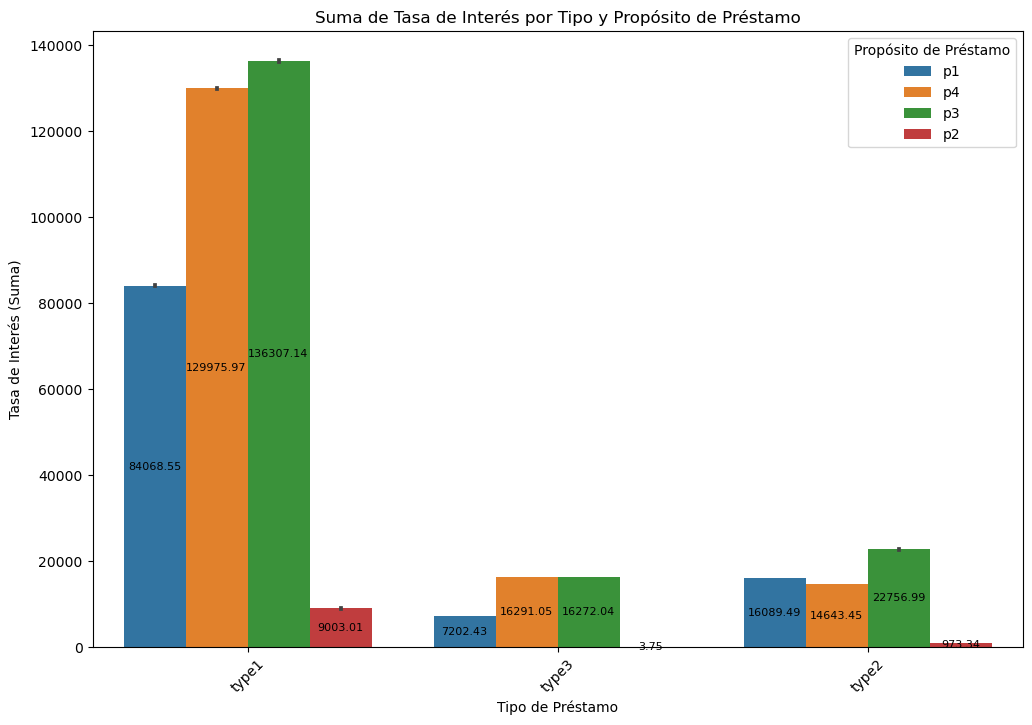

In [12]:
#Gráfico 4: Tasa de interés por tipo y propósito del préstamo

# Filtrar filas con valores no nulos
filtered_df = Loan_df.dropna(subset=['rate_of_interest', 'loan_type', 'loan_purpose'])

#Crear el gráfico
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=filtered_df, x='loan_type', y='rate_of_interest', hue='loan_purpose', estimator=sum)

#Agregar etiquetas a cada barra
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2f}', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=8)

plt.xlabel('Tipo de Préstamo')
plt.ylabel('Tasa de Interés (Suma)')
plt.title('Total de Tasa de Interés por Tipo y Propósito de Préstamo')
plt.xticks(rotation=45)
plt.legend(title='Propósito de Préstamo')
plt.show()

In [ ]:
#Conclusiones Gráfico 4: El gráfico muestra la suma de la tasa de interés total para varios tipos de préstamos según el 
#propósito del préstamo, siendo el tipo 1 y propósito p3 los mas solicitados. 

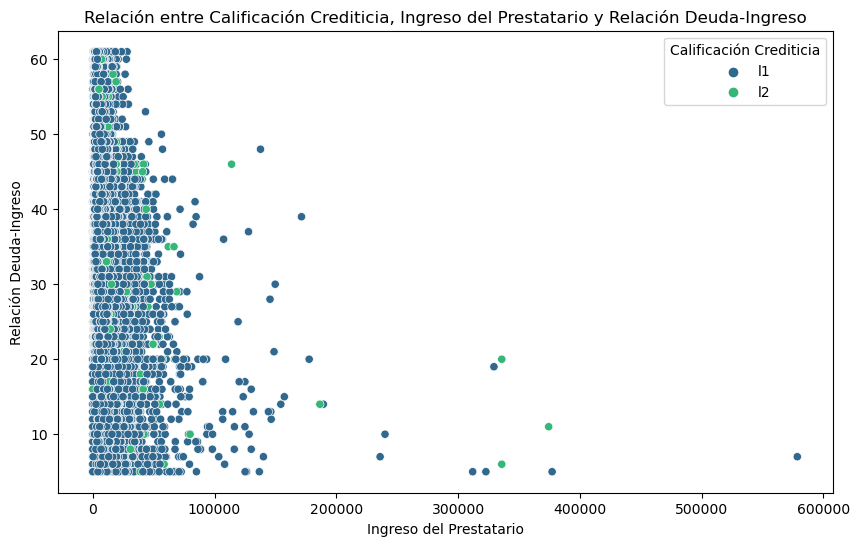

In [11]:
#Gráfico 5: Ingreso del prestatario y la relación deuda-ingreso en función de la calificación crediticia

#Filtrar filas con valores no nulos en las columnas relevantes
filtered_df = Loan_df.dropna(subset=['Credit_Worthiness', 'income', 'dtir1'])

#Crear el gráfico
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='income', y='dtir1', hue='Credit_Worthiness', palette='viridis')

#Agregar etiquetas y título
plt.xlabel('Ingreso del Prestatario')
plt.ylabel('Relación Deuda-Ingreso')
plt.title('Relación entre Calificación Crediticia, Ingreso del Prestatario y Relación Deuda-Ingreso')

#Mostrar la leyenda y gráfico
plt.legend(title='Calificación Crediticia')
plt.show()

In [ ]:
#Conclusiones Gráfico 5: Prestatarios con una relación deuda-ingresos baja (menos del 20%), generalmente considerados 
#financieramente saludables, podrían calificar para mejores calificaciones crediticias (posiblemente por encima de 600).
#Prestatarios con una relación deuda-ingresos alta (superior al 40%): esto podría indicar una posible dificultad para 
#gestionar las obligaciones de deuda y podría corresponder a calificaciones crediticias más bajas (posiblemente por debajo 
#de 600).

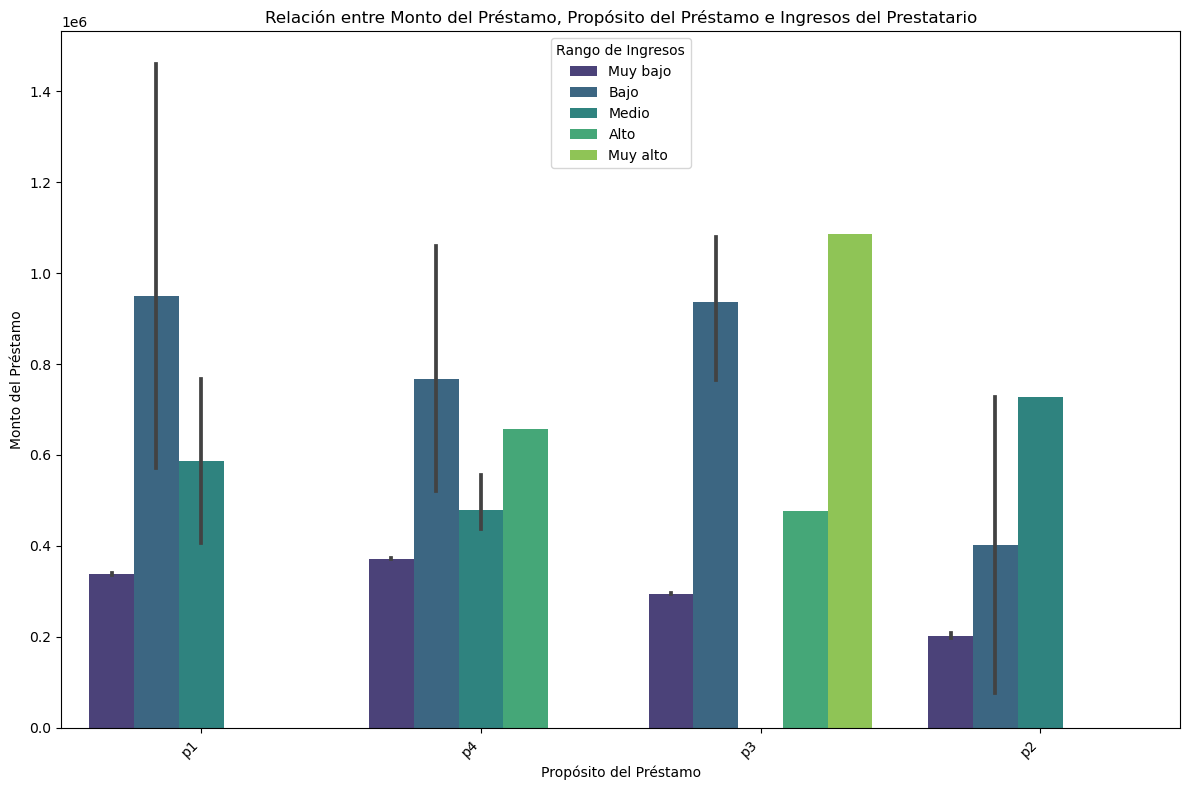

In [13]:
#Gráfico 6: propósito del préstamo, el monto del préstamo y ingresos del prestatario

#Filtrar para eliminar filas con valores nulos
filtered_df = Loan_df.dropna(subset=['loan_amount', 'income', 'loan_purpose'])

#Definir los rangos de ingresos del prestatario y los colores correspondientes
income_ranges = pd.cut(filtered_df['income'], bins=5, labels=['Muy bajo', 'Bajo', 'Medio', 'Alto', 'Muy alto'])
color_palette = sns.color_palette("viridis", 5)

#Crear el gráfico
plt.figure(figsize=(12, 8))
sns.barplot(data=filtered_df, x='loan_purpose', y='loan_amount', hue=income_ranges, palette=color_palette)

#Agregar etiquetas y título
plt.xlabel('Propósito del Préstamo')
plt.ylabel('Monto del Préstamo')
plt.title('Relación entre Monto del Préstamo, Propósito del Préstamo e Ingresos del Prestatario')

#Mostrar leyenda
plt.legend(title='Rango de Ingresos')

#Rotar las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=45, ha='right')

#Mostrar el gráfico
plt.tight_layout()
plt.show()

In [ ]:
#Conclusiones Gráfico 6: El gráfico sugiere una correlación positiva entre los ingresos de un prestatario y la cantidad que 
#puede pedir prestado para cada propósito del préstamo. 

In [ ]:
#Exploración de los datos con mayor detalle

In [4]:
#Ver cuantos valores Nulos hay por cada fila
Loan_df.isnull().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

In [ ]:
#Las columnas loan_limit, approv_in_adv, loan_purpose, rate_of_interest, Interest_rate_spread, Upfront_charges, term 
#Neg_ammortization, property_value, income, age, submission_of_application, LTV y dtir1 contienen valores nulos

In [5]:
#Rellenar con 0 todos los valores nulos del dataset
Loan_df_filled = Loan_df.fillna(0)

In [7]:
#Verificar que todos los nulos pasaron a ser 0
Loan_df_filled.isnull().sum()

ID                           0
year                         0
loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
Interest_rate_spread         0
Upfront_charges              0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
LTV                          0
Region                       0
Security_Type                0
Status  

In [8]:
#Verificar la existencia de valores duplicados
Loan_df_filled.duplicated().value_counts()

False    148670
Name: count, dtype: int64

In [ ]:
#El dataset no tiene valores duplicados

In [10]:
#Análisis de las variables para verificar la cantidad de categorías que poseen.
Loan_df_filled["year"].unique()

array([2019], dtype=int64)

In [11]:
Loan_df_filled["ID"].unique()

array([ 24890,  24891,  24892, ..., 173557, 173558, 173559], dtype=int64)

In [12]:
#Eliminar las columnas ID y Year, ya que no contienen datos relevantes para el modelo
Loan_dfnew = Loan_df_filled.drop(['ID', 'year'], axis=1)
Loan_dfnew

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,0.000,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,0.000,...,EQUI,552,EXP,55-64,to_inst,0.000000,North,direct,1,0.0
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.560,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.250,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.000,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,436500,3.125,...,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
148666,cf,Male,nopre,type1,p1,l1,nopc,nob/c,586500,5.190,...,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
148667,cf,Male,nopre,type1,p4,l1,nopc,nob/c,446500,3.125,...,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0
148668,cf,Female,nopre,type1,p4,l1,nopc,nob/c,196500,3.500,...,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0


In [14]:
#Confirmar columnas que quedaron disponibles
Loan_dfnew.columns

Index(['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'Credit_Worthiness', 'open_credit', 'business_or_commercial',
       'loan_amount', 'rate_of_interest', 'Interest_rate_spread',
       'Upfront_charges', 'term', 'Neg_ammortization', 'interest_only',
       'lump_sum_payment', 'property_value', 'construction_type',
       'occupancy_type', 'Secured_by', 'total_units', 'income', 'credit_type',
       'Credit_Score', 'co-applicant_credit_type', 'age',
       'submission_of_application', 'LTV', 'Region', 'Security_Type', 'Status',
       'dtir1'],
      dtype='object')

In [18]:
Loan_dfnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 32 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   loan_limit                 148670 non-null  object 
 1   Gender                     148670 non-null  object 
 2   approv_in_adv              148670 non-null  object 
 3   loan_type                  148670 non-null  object 
 4   loan_purpose               148670 non-null  object 
 5   Credit_Worthiness          148670 non-null  object 
 6   open_credit                148670 non-null  object 
 7   business_or_commercial     148670 non-null  object 
 8   loan_amount                148670 non-null  int64  
 9   rate_of_interest           148670 non-null  float64
 10  Interest_rate_spread       148670 non-null  float64
 11  Upfront_charges            148670 non-null  float64
 12  term                       148670 non-null  float64
 13  Neg_ammortization          14

In [19]:
#Codificación de columnas (convertir todas las variables no numéricas en variables numéricas)

# Seleccionar las columnas categóricas para la codificación one-hot
categorical_columns = ['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 
                       'Credit_Worthiness', 'open_credit', 'business_or_commercial', 
                       'Neg_ammortization', 'interest_only', 'lump_sum_payment', 
                       'construction_type', 'occupancy_type', 'Secured_by', 
                       'total_units', 'credit_type', 'co-applicant_credit_type', 
                       'age', 'submission_of_application', 'Region', 'Security_Type']

# Aplicar la codificación one-hot a las columnas seleccionadas
Loan_df_encoded = pd.get_dummies(Loan_dfnew, columns=categorical_columns)

# Mostrar las primeras filas del DataFrame codificado
Loan_df_encoded.head()

,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,...,age_>74,submission_of_application_0,submission_of_application_not_inst,submission_of_application_to_inst,Region_North,Region_North-East,Region_central,Region_south,Security_Type_Indriect,Security_Type_direct
0,116500,0.00,0.0000,0.0,360.0,118000.0,1740.0,758,98.728814,1,...,False,False,False,True,False,False,False,True,False,True
1,206500,0.00,0.0000,0.0,360.0,0.0,4980.0,552,0.000000,1,...,False,False,False,True,True,False,False,False,False,True
2,406500,4.56,0.2000,595.0,360.0,508000.0,9480.0,834,80.019685,0,...,False,False,False,True,False,False,False,True,False,True
3,456500,4.25,0.6810,0.0,360.0,658000.0,11880.0,587,69.376900,0,...,False,False,True,False,True,False,False,False,False,True
4,696500,4.00,0.3042,0.0,360.0,758000.0,10440.0,602,91.886544,0,...,False,False,True,False,True,False,False,False,False,True


In [25]:
#Importar nuevas librerias para aplicar un algoritmo de clasificación y calculo de métricas
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [31]:
# Crear y entrenar el modelo de Random Forest
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_rf = model_rf.predict(X_test)

# Hacer predicciones en el conjunto de entrenamiento
y_pred_rf_train = model_rf.predict(X_train)

In [32]:
# Calcular el F1-score en el conjunto de entrenamiento
f1_train = f1_score(y_train, y_pred_rf_train)

# Calcular el F1-score en el conjunto de prueba
f1_test = f1_score(y_test, y_pred_rf)

print("F1-score en el conjunto de entrenamiento:", f1_train)
print("F1-score en el conjunto de prueba:", f1_test)

F1-score en el conjunto de entrenamiento: 1.0
F1-score en el conjunto de prueba: 1.0


In [ ]:
#Con base a los resultados obtenidos, un F1-score de 1.0 en ambos conjuntos de entrenamiento y prueba, puede indicar un 
#sobreajuste (overfitting), donde el modelo se ajusta demasiado bien a los datos de entrenamiento y no generaliza bien 
#a nuevos datos. Por lo cual se procede con un análisis de matriz de confusión.

In [33]:
#Importar librería para Matriz de Confusión
from sklearn.metrics import confusion_matrix

In [34]:
# Calcular la matriz de confusión en el conjunto de prueba
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Mostrar la matriz de confusión
print("Matriz de Confusión:")
print(conf_matrix)

Matriz de Confusión:
[[22494     0]
 [    0  7240]]


In [ ]:
#La matriz de confusión que has obtenido muestra que no hay ningún error en las predicciones del modelo.
#Todos los préstamos que se pagaron a tiempo fueron clasificados correctamente como tal, y todos los préstamos que 
#se defaultearon también fueron clasificados correctamente. Esto sugiere que el modelo es perfecto en la clasificación 
#de los datos en este conjunto de prueba.

In [ ]:
#Conclusiones: El modelo ha aprendido perfectamente los datos de entrenamiento y es capaz de generalizar bien 
#para hacer predicciones precisas en nuevos datos. Usualmente este tipo de resultados es inusual en la práctica, rara vez
#se obtiene este tipo de resultado y podría ser un indicio de sobreajuste.